<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/ML_05_Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Definition & Working principle
**Let's build model using Linear regression.**

Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the principle of ordinary least square  (OLS)  / Mean square errror  (MSE) . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

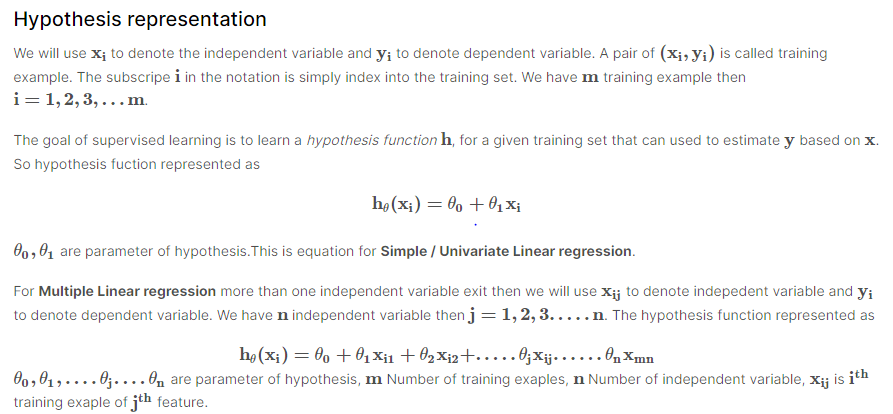

# Import Library and Dataset
Now we will import couple of python library required for our analysis and import dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [89]:
df = pd.read_csv("/content/drive/MyDrive/All CSV files/insurance.csv")

In [90]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
df.shape

(1338, 7)

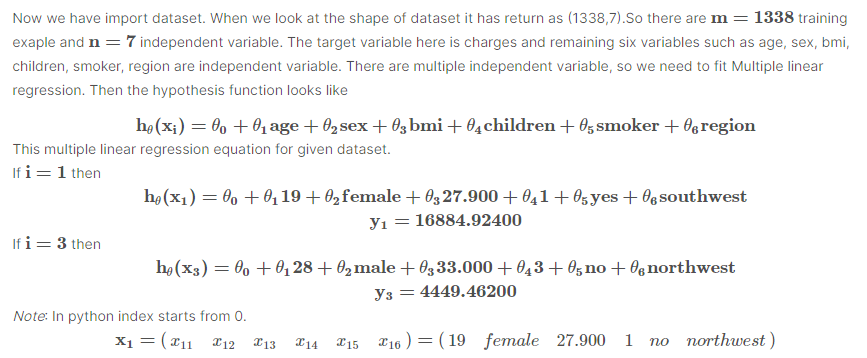

In [92]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [93]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [94]:
pd.isnull(df)

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


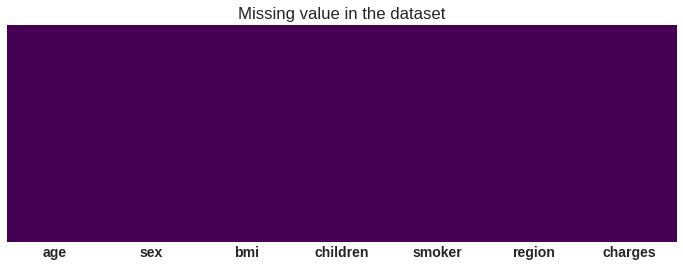

In [95]:
#Check for missing value¶
#There is no missing value in the data sex
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

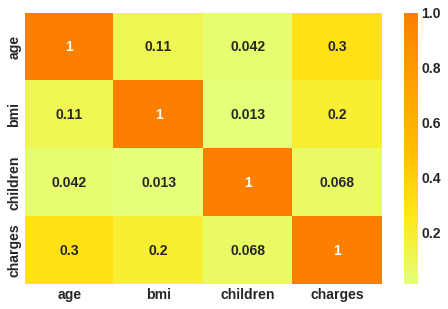

In [96]:
# correlation plot
#Thier no correlation among valiables.
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


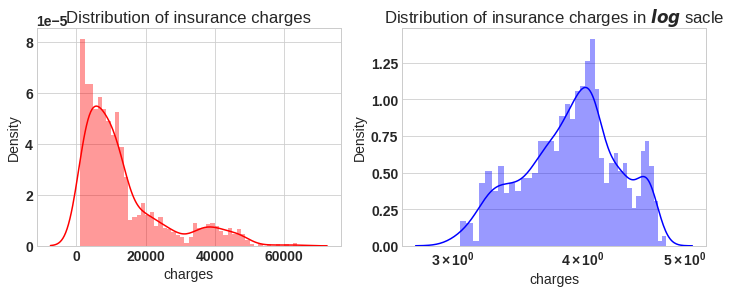

In [97]:
from pandas._libs.hashtable import mode
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal

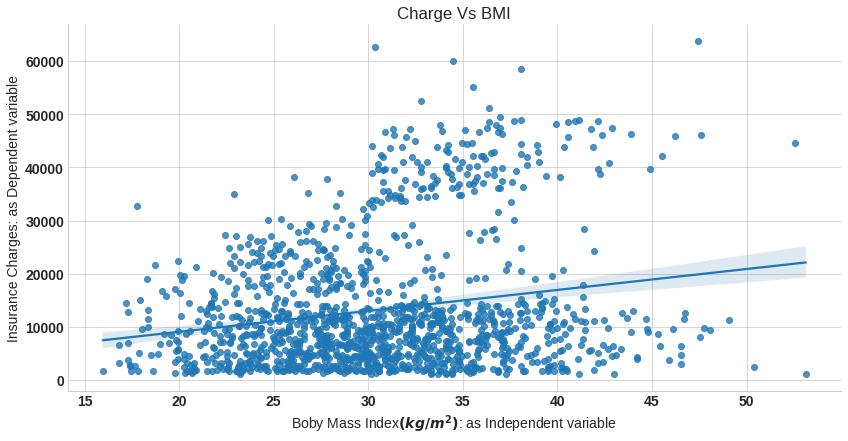

In [98]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

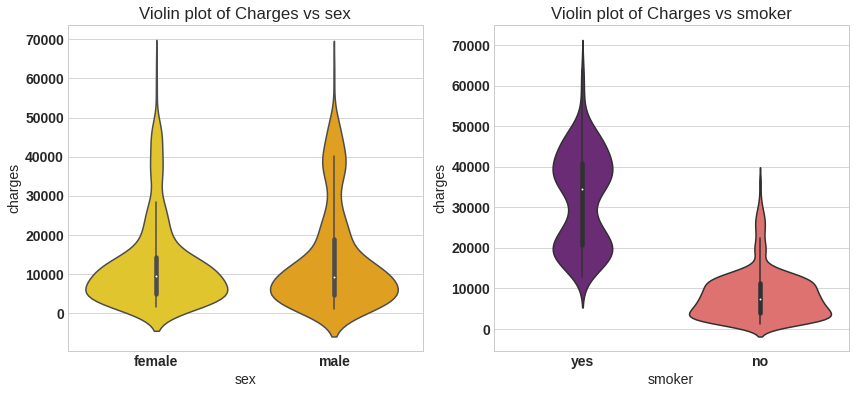

In [99]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

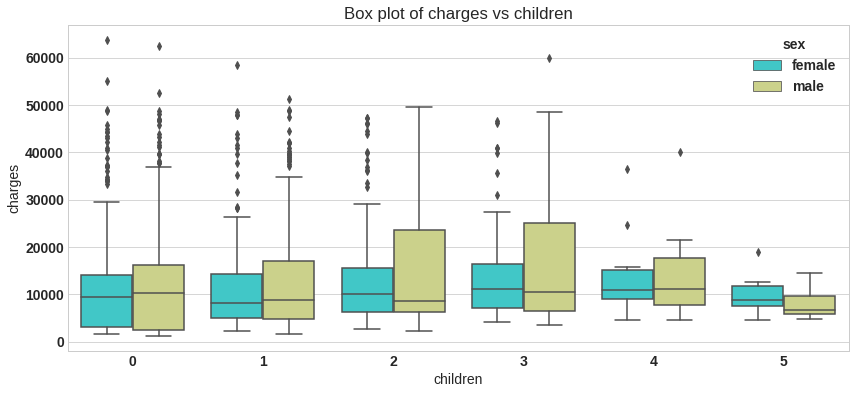

In [100]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [101]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


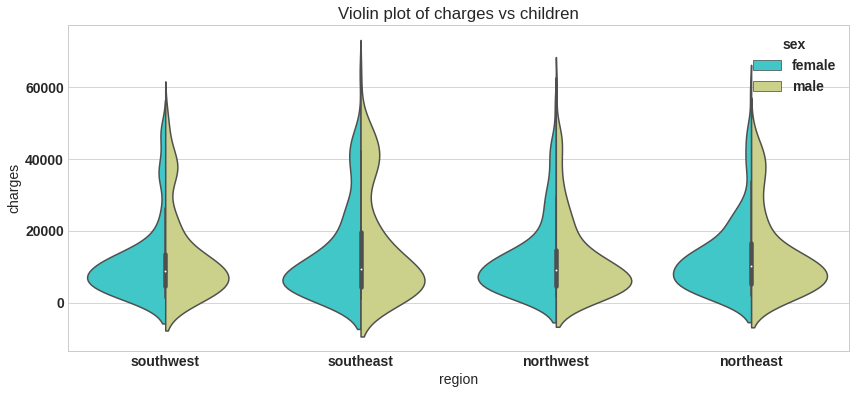

In [102]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

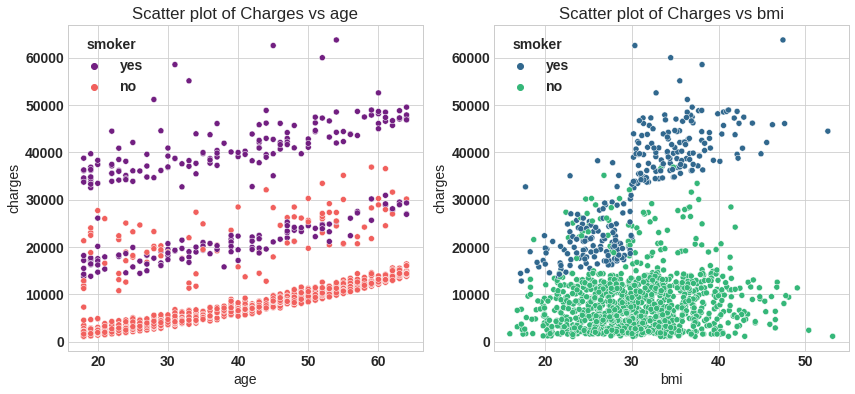

In [103]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take 1st and 2nd slab, for smoker policy start at 2nd and 3rd slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2 and maximum upto 54 kg/m2

# Data Preprocessing
## Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Label Encoding
2. One hot encoding
3. Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [104]:
# Get dependent and independent variables - X and y
X = df.drop(['charges'], axis = 1)
y = df.charges

In [105]:
print(X.head())
print('\n\n\n', y.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest



 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [106]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [107]:
print(X_train.head(), '\n\n')
print(X_test.head(), '\n\n')
print(y_train.head(), '\n\n')
print(y_test.head(), '\n\n')

      age     sex    bmi  children smoker     region
1110   54  female  32.30         1     no  northeast
277    22  female  24.30         0     no  southwest
232    19  female  17.80         0     no  southwest
729    41  female  36.08         1     no  southeast
572    30  female  43.12         2     no  southeast 


      age     sex    bmi  children smoker     region
1111   38    male  38.39         3    yes  southeast
275    47  female  26.60         2     no  northeast
430    19    male  33.10         0     no  southwest
154    40  female  25.46         1     no  northeast
920    62  female  25.00         0     no  southwest 


1110    11512.4050
277      2150.4690
232      1727.7850
729      6781.3542
572      4753.6368
Name: charges, dtype: float64 


1111    41949.24410
275      9715.84100
430     23082.95533
154      7077.18940
920     13451.12200
Name: charges, dtype: float64 




In [108]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8') 

In [109]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


# Train-Test split

In [110]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=72)

# Model building

In [111]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

LinearRegression()

In [112]:
# Finding interception and coefficients
print(lin_reg.intercept_)
print(list(lin_reg.coef_))

-12790.459829262538
[266.6397922608986, 343.03014142275526, -366.4207544490354, 1185.1744984404568, 1605.2451742741678, 1595.4218966370256, 4528.046720513493, 1629.5774103312242, 24020.07206781989, -683.6176970066091, -871.0423505974287, -1007.2287026415538]


In [113]:
# sklearn regression module --Predict on X test data --get mse for training as well as testing
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  38492848.26663654
R square obtain for scikit learn library is : 0.7245435345437188


In [114]:
# sklearn regression module --Predict on X train data --get mse for training as well as testing
y_pred_sk1 = lin_reg.predict(X_train)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk1, y_train)

# R_square
R_square_sk = lin_reg.score(X_train,y_train)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  35789593.31830536
R square obtain for scikit learn library is : 0.7605452742009127


In [115]:
# sklearn regression module --Predict on X test data --get rms for training as well as testing
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_pred_sk, y_test, squared=False)


print('The Mean Square Error(RMS) or J(theta) is: ' ,rms)

The Mean Square Error(RMS) or J(theta) is:  6204.26049313184


In [116]:
# sklearn regression module --Predict on X test data --get rms for training as well as testing
y_pred_sk1 = lin_reg.predict(X_train)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_pred_sk1, y_train, squared=False)


print('The Mean Square Error(RMS) or J(theta) is: ' ,rms)

The Mean Square Error(RMS) or J(theta) is:  5982.440414939822


# Model Validation ( Validate Our Model by checking the assumptions)
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value

2. The residual error plot should be normally distributed.

3. The mean of residual error should be 0 or close to 0 as much as possible
The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.

4. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. 

# Residual error

In [119]:
from sklearn.linear_model import LinearRegression   ## importing the model library

LR=LinearRegression()  ## importing the model object
LR.fit(X_train,y_train) ## fitting the training data

X_test_pred=LR.predict(X_test)

In [120]:
X_test_pred

array([34888.81026528, 10471.45734312,  2256.3444477 ,  7793.85376024,
       11309.73212384, 16227.00593461, 10130.53780843,  5503.59534454,
        5856.79995629, 11038.59032979,  9797.69604379,  4378.14617702,
       14428.00912576, 15845.55137038, 30179.20382609, 12864.88261205,
        3273.85369242, 27922.40871634, 26195.25195427,  6422.71984063,
       31401.70942409,   -43.76927719, 27670.27568051, 13768.4594537 ,
       15649.17124216,  7900.64700641,  9894.01308542, 14682.62415545,
        1827.85972309,  7773.48763043,  3673.85572426,  4789.5657885 ,
       11573.01599338, 16041.17017531,  1027.05427866,  6677.27642653,
        1330.16306586, 15782.88082673, 26893.87077008,  9926.83445311,
        8048.27021835, 26721.86721888, 11260.03069176, 12165.40441428,
        9782.4332254 ,  2069.29838563, 16810.17767098,  4244.60405355,
        5793.72266451, 15912.20043505,  2733.49694684, 27190.75214703,
        5748.73506066,  4794.83316385, 11957.26030699, 29615.72420898,
      

In [121]:
y_test

1111    41949.24410
275      9715.84100
430     23082.95533
154      7077.18940
920     13451.12200
           ...     
236      1615.76670
469      2201.09710
1140     9048.02730
875      2690.11380
667     40003.33225
Name: charges, Length: 402, dtype: float64

In [122]:
X_train_pred=LR.predict(X_train)

X_train_pred

array([ 1.38731370e+04,  4.04019334e+02, -2.62559596e+03,  1.08324313e+04,
        1.07343965e+04,  8.63390375e+03,  5.75862094e+03,  5.48419374e+03,
        1.12232598e+04,  1.10349518e+04,  2.78099203e+03,  1.45407486e+04,
        7.97429542e+03,  7.63179287e+03,  3.54537663e+04,  1.07514147e+04,
        1.75696747e+04,  8.02067887e+03, -2.77817536e+03,  9.91950607e+03,
        1.41449065e+04, -1.04435394e+03,  1.69228839e+04,  1.01225586e+04,
        7.21339764e+03,  2.96476793e+04,  6.48118551e+03,  3.21790356e+04,
        1.21861418e+04,  8.52894537e+03,  5.30200127e+03,  1.46116625e+04,
        3.86789570e+04,  9.37936613e+03,  1.02242417e+04,  1.39089769e+04,
        3.87515588e+04,  1.56496193e+04,  1.69958439e+04,  1.17957191e+04,
        3.84229502e+04,  1.36027543e+04,  1.06284922e+04,  1.63032253e+04,
        7.75937780e+03,  1.10949350e+04,  1.05387770e+04,  8.54498812e+03,
        1.57422387e+04, -2.10398464e+02,  5.04594531e+03,  3.51464479e+04,
        2.12280053e+03,  

In [123]:
X_train=LR.predict(X_train)
X_train

array([ 1.38731370e+04,  4.04019334e+02, -2.62559596e+03,  1.08324313e+04,
        1.07343965e+04,  8.63390375e+03,  5.75862094e+03,  5.48419374e+03,
        1.12232598e+04,  1.10349518e+04,  2.78099203e+03,  1.45407486e+04,
        7.97429542e+03,  7.63179287e+03,  3.54537663e+04,  1.07514147e+04,
        1.75696747e+04,  8.02067887e+03, -2.77817536e+03,  9.91950607e+03,
        1.41449065e+04, -1.04435394e+03,  1.69228839e+04,  1.01225586e+04,
        7.21339764e+03,  2.96476793e+04,  6.48118551e+03,  3.21790356e+04,
        1.21861418e+04,  8.52894537e+03,  5.30200127e+03,  1.46116625e+04,
        3.86789570e+04,  9.37936613e+03,  1.02242417e+04,  1.39089769e+04,
        3.87515588e+04,  1.56496193e+04,  1.69958439e+04,  1.17957191e+04,
        3.84229502e+04,  1.36027543e+04,  1.06284922e+04,  1.63032253e+04,
        7.75937780e+03,  1.10949350e+04,  1.05387770e+04,  8.54498812e+03,
        1.57422387e+04, -2.10398464e+02,  5.04594531e+03,  3.51464479e+04,
        2.12280053e+03,  

In [124]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
## prediction on training data

train_score=r2_score(y_train,X_train_pred)

In [125]:
print('Linear Regression training score :',train_score)

Linear Regression training score : 0.7605452742009127


In [126]:
## prediction on testing data

test_score=r2_score(y_test,X_test_pred)

print('Linear Regression testing score :',test_score)

Linear Regression testing score : 0.7245435345437188


In [127]:
## mean squared error and mean absolute error of training data

print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred))

MSE: 35789593.31830536
MAE: 4129.423314733011


In [128]:
## mean squared error and mean absolute error of testing data

print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 38492848.26663654
MAE 4298.147319674663


In [129]:
## Root mean squared error

import math
print(math.sqrt(mean_squared_error(y_test,X_test_pred)))

6204.26049313184


In [130]:
print(math.sqrt(mean_squared_error(y_train,X_train_pred)))

5982.440414939822


In [131]:
X_train.shape,X_test.shape

((936,), (402, 12))

# Adjusted r2 score

In [132]:
## adjusted r2 score

train_adjusted_r2score=1-(1-0.71)*(1003-1)/(1003-6-1)
train_adjusted_r2score

0.7082530120481927

In [133]:
test_adjusted_r2score=1-(1-0.74)*(335-1)/(335-6-1)
test_adjusted_r2score

0.7352439024390244


# model validation